## **Linear Regression with Scikit Learn**
## **Student Data Set**

### **Author: Ippagunta Sai Kanishka**




In [19]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [20]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


# **Pandas DF**

In [21]:
data.head(3)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27


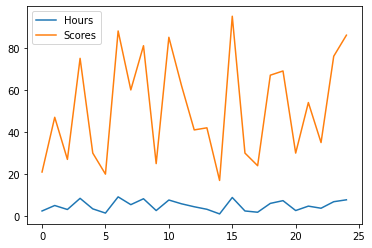

In [22]:
data.plot()

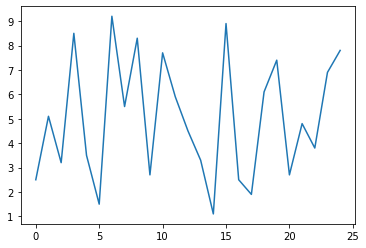

In [23]:
data["Hours"].plot()

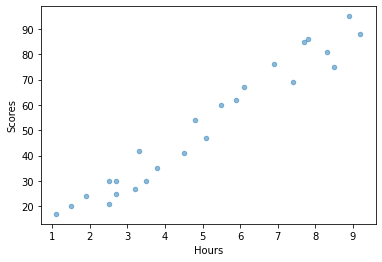

In [24]:
data.plot.scatter(x="Hours",y="Scores",alpha=0.5)

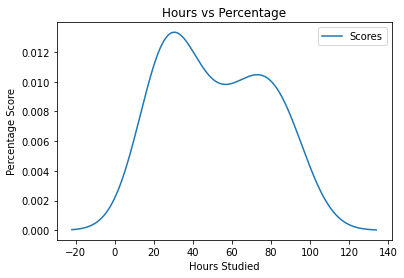

In [25]:
data.plot(x='Hours',y='Scores', kind='kde')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [26]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [27]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [28]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


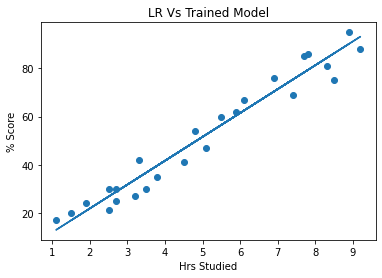

In [29]:
# Regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.title("LR Vs Trained Model")
plt.xlabel('Hrs Studied')
plt.ylabel('% Score')
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [30]:
print(X_test)
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [31]:
#Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [32]:
print("Trained score:", regressor.score(X_train, y_train))
print("Test score:", regressor.score(X_test, y_test))

Trained score: 0.9515510725211553
Test score: 0.9454906892105354


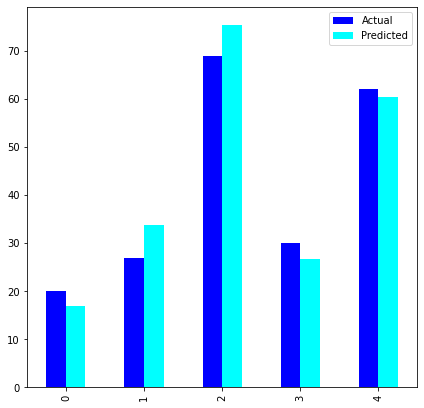

In [33]:
df.plot(kind='bar',figsize=(7,7),color=('blue','cyan'))
plt.show()

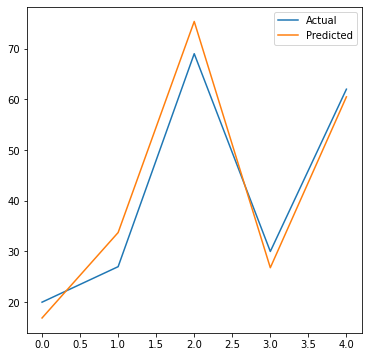

In [34]:
df.plot(kind='line', figsize=(6,6))
plt.show()

In [35]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
pred = regressor.predict([[9.5]])
print("No. of Hrs Studied = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No. of Hrs Studied = 9.25
Predicted Score = 96.16939660753593


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [36]:
from sklearn import metrics  
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Explained Variance Score:',metrics.explained_variance_score(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Squared Error: 21.598769307217456
Mean Absolute Error: 4.183859899002982
Explained Variance Score: 0.9482829156738145
Root Mean Squared Error: 4.647447612100373


# Result: Student will score(96.16)